In [2]:
install.packages("bio3d", dependencies=TRUE)

Warning message:
“dependency ‘msa’ is not available”also installing the dependencies ‘utf8’, ‘rappdirs’, ‘pillar’, ‘sys’, ‘sass’, ‘base64enc’, ‘rprojroot’, ‘rlang’, ‘fs’, ‘diffobj’, ‘fansi’, ‘rematch2’, ‘tibble’, ‘askpass’, ‘bigmemory.sri’, ‘uuid’, ‘BH’, ‘evaluate’, ‘highr’, ‘yaml’, ‘xfun’, ‘bslib’, ‘htmltools’, ‘jquerylib’, ‘tinytex’, ‘brio’, ‘callr’, ‘cli’, ‘desc’, ‘ellipsis’, ‘lifecycle’, ‘pkgload’, ‘praise’, ‘processx’, ‘ps’, ‘waldo’, ‘withr’, ‘mime’, ‘openssl’, ‘ncdf4’, ‘igraph’, ‘bigmemory’, ‘knitr’, ‘rmarkdown’, ‘testthat’, ‘httr’

Warning message in install.packages("bio3d", dependencies = TRUE):
“installation of package ‘ncdf4’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(bio3d)

In [4]:
dcdfile <- "/home/satyam/Downloads/Software/catdcd/catdcd-4.0b/LINUXAMD64/bin/catdcd4.0/last10ns.dcd"

In [5]:
dcd <- read.dcd(dcdfile)

Warning message in dcd.header(trj, verbose):
“Check DCD header data is correct, particulary natom”

 NATOM = 154909 
 NFRAME= 201 
 ISTART= 0 
 last  = 201 
 nstep = 201 
 nfile = 201 
 NSAVE = 1 
 NDEGF = 0 
 version 24 
  |======================================================================| 100%


In [6]:
print(dcd)


   Total Frames#: 201
   Total XYZs#:   464727,  (Atoms#:  154909)

    [1]  81.97  74.4  59.58  <...>  124.97  110.18  17.32  [93410127] 

+ attr: Matrix DIM = 201 x 464727


In [8]:
pdbfile <- "/home/satyam/Documents/comp/simulation_service/Rania/alpha2/MD_Sim/Kaempferol/protein_clean.pdb"

In [9]:
pdb <- read.pdb(pdbfile)

In [10]:
print(pdb)


 Call:  read.pdb(file = pdbfile)

   Total Models#: 1
     Total Atoms#: 7194,  XYZs#: 21582  Chains#: 1  (values: A)

     Protein Atoms#: 7194  (residues/Calpha atoms#: 465)
     Nucleic acid Atoms#: 0  (residues/phosphate atoms#: 0)

     Non-protein/nucleic Atoms#: 0  (residues: 0)
     Non-protein/nucleic resid values: [ none ]

   Protein sequence:
      MFRQEQPLAEGSFAPMGSLQPDAGNASWNGTEAPGGGARATPYSLQVTLTLVCLAGLLML
      LTVFGNVLVIIAVFTSRALKAPQNLFLVSLASADILVATLVIPFSLANEVMGYWYFGKAW
      CEIYLALDVLFCTSSIVHLCAISLDRYWSITQAIEYNLKRTPRRIKAIIITVWVISAVIS
      FPPLISIEKKGGGGGPQPAEPRCEINDQKWYVISSCIGSFFAPCL...<cut>...KRIV

+ attr: atom, xyz, calpha, call


In [11]:
ca.inds <- atom.select(pdb, elety = "CA")

In [12]:
xyz <- fit.xyz(fixed = pdb$xyz, mobile = dcd, fixed.inds = ca.inds$xyz, mobile.inds = ca.inds$xyz)

In [13]:
cij <- dccm(xyz[, ca.inds$xyz])

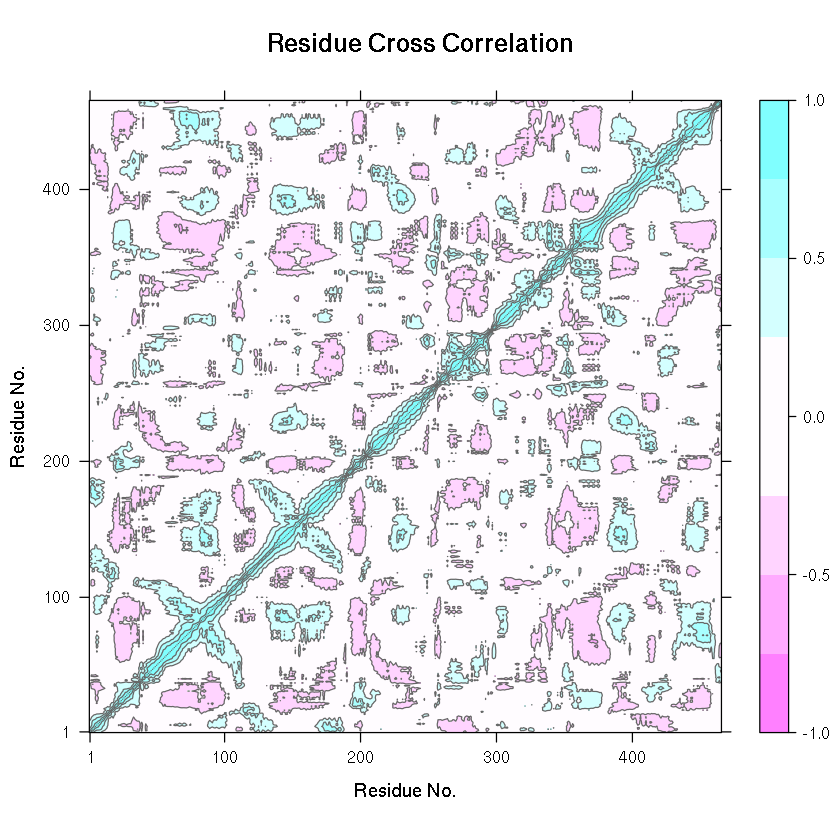

In [14]:
plot(cij)